In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize images to range [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Reshape to (batch, height, width, channel)
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test  = np.reshape(x_test, (-1, 28, 28, 1))

# -------- Add Gaussian Noise --------
noise_factor = 0.4  # controls noise strength

x_train_noisy = x_train + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=x_train.shape
)

x_test_noisy = x_test + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=x_test.shape
)

# Clip values to valid image range [0,1]
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy  = np.clip(x_test_noisy, 0.0, 1.0)


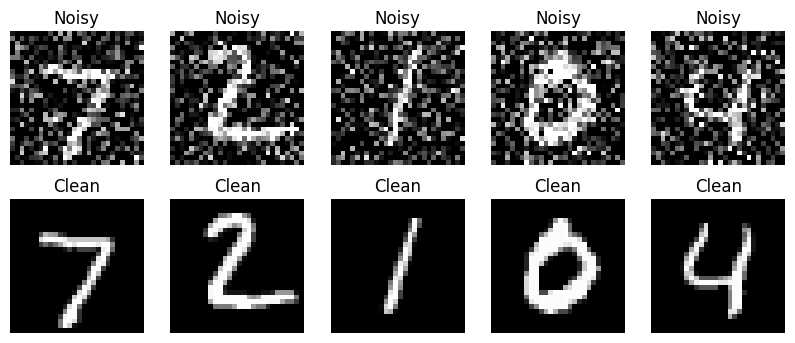

In [2]:
n = 5
plt.figure(figsize=(10,4))

for i in range(n):
    # Noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Clean
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Clean")
    plt.axis("off")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_img = tf.keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2,2), padding="same")(x)

x = layers.Conv2D(64, (3,3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2,2), padding="same")(x)

#  Decoder 
x = layers.Conv2D(64, (3,3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2,2))(x)

decoded = layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

# Autoencoder model
autoencoder = models.Model(input_img, decoded)

autoencoder.compile(
    optimizer="adam",
    loss="binary_crossentropy"
)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - loss: 0.1414 - val_loss: 0.1001
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0970 - val_loss: 0.0941
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0926 - val_loss: 0.0903
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0904 - val_loss: 0.0891
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0890 - val_loss: 0.0891
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0881 - val_loss: 0.0869
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0873 - val_loss: 0.0867
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0867 - val_loss: 0.0859
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0862 - val_loss: 0.0855
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0858 - val_loss: 0.0863


In [5]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


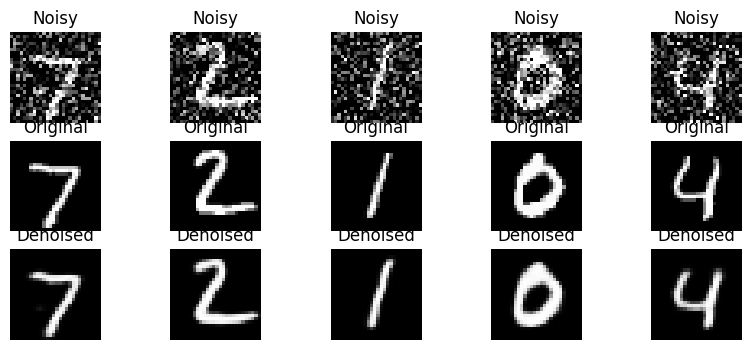

In [6]:
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(10,4))

for i in range(n):

    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Clean target
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Model output
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.show()


In [7]:
print(history.history["loss"][-1])
print(history.history["val_loss"][-1])

0.08578819036483765
0.08633754402399063


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_list = []

for i in range(len(x_test)):
    mse = mean_squared_error(
        x_test[i].flatten(),
        decoded_imgs[i].flatten()
    )
    mse_list.append(mse)

print("Average MSE:", np.mean(mse_list))

Average MSE: 0.008072497506754006


In [ ]:
import tensorflow as tf

# PSNR gives you a measure of how close the denoised image is to the original, in terms of signal quality.
# output: average (21.25)
psnr = tf.image.psnr(decoded_imgs, x_test, max_val=1.0)
print("Average PSNR:", tf.reduce_mean(psnr).numpy())

Average PSNR: 21.25444


In [ ]:
# Average SSIM: 0.89723015 means that the denoised images are quite similar to the original images in terms of structural content, with a value close to 1 indicating high similarity.
ssim = tf.image.ssim(decoded_imgs, x_test, max_val=1.0)
print("Average SSIM:", tf.reduce_mean(ssim).numpy())

Average SSIM: 0.89723015
